In [40]:
import pandas as pd

In [84]:
df = pd.read_csv("airbnb.zip")

In [85]:
df['date_account_created'] = pd.to_datetime(df.date_account_created)
df['date_first_booking'] = pd.to_datetime(df.date_first_booking)
df['timestamp_first_active'] = pd.to_datetime(df.timestamp_first_active, format="%Y%m%d%H%M%S")  # YYYYMMDDHHMMSS

In [49]:
df.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [50]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [58]:
df.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [59]:
import numpy as np
df.loc[df.gender=='-unknown-', 'gender'] = np.NaN  # replacement
df.loc[df.first_affiliate_tracked=='untracked', 'first_affiliate_tracked'] = np.NaN  # replacement

In [51]:
import missingno as msno

<AxesSubplot:>

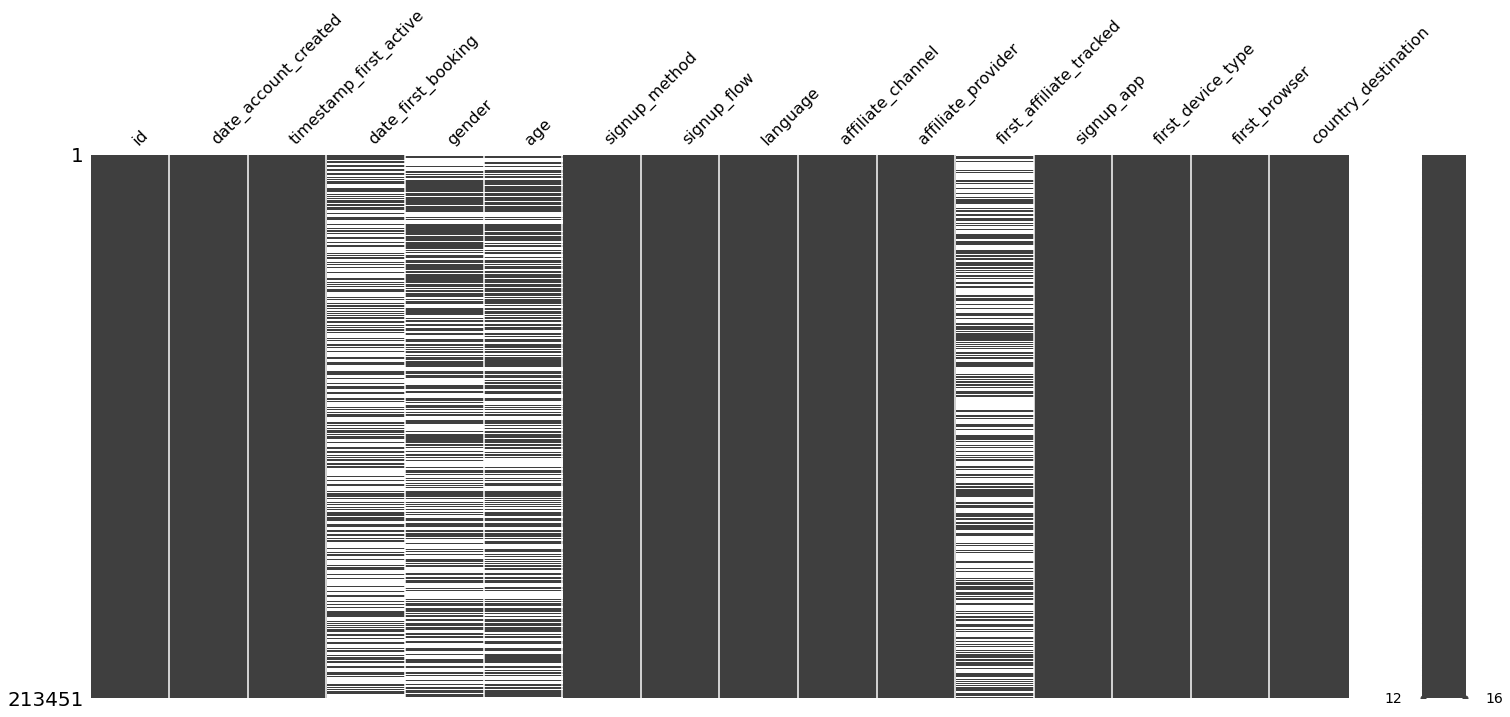

In [60]:
msno.matrix(df)

In [62]:
df[df.age>100]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,2010-04-11 06:56:02,2010-04-13,NaN,2014.0,basic,3,en,other,craigslist,NaN,Web,Windows Desktop,Firefox,FR
398,9ouah6tc30,2010-04-12,2010-04-12 23:15:34,2010-04-12,FEMALE,104.0,facebook,3,en,other,craigslist,linked,Web,iPhone,Mobile Safari,FR
627,dc3udjfdij,2010-05-19,2010-05-19 01:24:55,2010-06-16,NaN,105.0,basic,2,en,other,craigslist,omg,Web,Mac Desktop,Safari,FR
673,umf1wdk9uc,2010-05-25,2010-05-25 15:55:41,NaT,FEMALE,2014.0,basic,2,en,other,craigslist,NaN,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,2010-07-14 23:05:56,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,NaN,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212981,l6y2gwgoni,2014-06-30,2014-06-30 03:56:17,2014-07-27,NaN,105.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,US
213106,1c83n850up,2014-06-30,2014-06-30 08:57:41,NaT,MALE,110.0,facebook,25,en,direct,direct,NaN,iOS,iPhone,-unknown-,NDF
213182,kh8odg7wnv,2014-06-30,2014-06-30 16:48:58,2014-07-04,FEMALE,105.0,basic,0,en,direct,direct,linked,Web,iPhone,Mobile Safari,ES
213199,lyuno62d1q,2014-06-30,2014-06-30 17:18:21,2014-07-07,MALE,105.0,basic,0,en,direct,direct,NaN,Web,Windows Desktop,Chrome,US


In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
model = KMeans(5)
scaler = MinMaxScaler()

In [76]:
df_scaled = scaler.fit_transform(df[['age']].dropna())
df_scaled
model.fit(df_scaled)  # entweder age NA-Werte verwerfen (dropna) oder Imputation (bspw. NA-Werte durch Mittelwert ersetzen)
#df.age.dropna()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
scaler.inverse_transform(model.cluster_centers_)

array([[  39.42588581],
       [2011.09756098],
       [  57.71275256],
       [ 102.37951807],
       [  27.87660163]])

In [79]:
df_clusters = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_))
df_clusters.columns = my_df.columns
df_clusters

NameError: name 'my_df' is not defined

In [80]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,NaN,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,NaN,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,NaN,32.0,basic,0,en,direct,direct,NaN,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,NaN,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [87]:
df['signup_till_booking_days'] = (df.date_first_booking - df.date_account_created).dt.days

In [119]:
#(df.date_first_booking - df.date_account_created).dt.days
df.date_account_created.dt.day_name()

0            Monday
1         Wednesday
2           Tuesday
3            Monday
4           Tuesday
            ...    
213446       Monday
213447       Monday
213448       Monday
213449       Monday
213450       Monday
Name: date_account_created, Length: 213451, dtype: object

In [88]:
gender_mapping = {'MALE':0, 'FEMALE':10, 'OTHER':20, '-unknown-':30}
df['gender'] = df.gender.map(gender_mapping)
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,signup_till_booking_days
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,30,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,0,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,10,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,-57.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,10,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,278.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,30,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,-208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,0,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,NaN
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,30,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,NaN
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,30,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,NaN
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,30,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,NaN


In [89]:
my_df = df[['signup_till_booking_days', 'gender', 'age']].copy()

In [95]:
my_df = my_df[my_df.age<100]

In [96]:
df_scaled = scaler.fit_transform(my_df.dropna())
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
df_clusters = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_))
df_clusters.columns = my_df.columns
df_clusters

,signup_till_booking_days,gender,age
0,43.924892,2.993540e+01,36.753402
1,19.381616,5.012657e-13,36.088871
2,20.200000,1.002552e+01,30.946418
3,271.212751,5.694091e+00,34.773113
4,23.575983,9.494657e+00,55.895671


In [98]:
# get counts of clusters to undertand their size and relevance
df_cluster_assignment = pd.DataFrame(model.predict(df_scaled))
df_cluster_assignment.columns = ['Cluster']
df_cluster_assignment['Cluster'] = df_cluster_assignment['Cluster'].apply(lambda x: f"Cluster {x}")
df_cluster_assignment['no_of_users_in_cluster'] = 1
df_cluster_volumes = df_cluster_assignment.groupby('Cluster').sum()
df_cluster_volumes = df_cluster_volumes.reset_index()
total_cluster_volume = df_cluster_volumes.no_of_users_in_cluster.sum()
df_cluster_volumes['percentage'] = (df_cluster_volumes.no_of_users_in_cluster / total_cluster_volume) * 100.0
df_cluster_volumes

,Cluster,no_of_users_in_cluster,percentage
0,Cluster 0,11610,17.276272
1,Cluster 1,22613,33.649296
2,Cluster 2,20386,30.335407
3,Cluster 3,7072,10.523496
4,Cluster 4,5521,8.215529


In [99]:
import plotly.graph_objects as go
# radar plot of clusters
fig = go.Figure()

for index, row in df_clusters.iterrows():
    df_temp = pd.DataFrame(row).reset_index()
    df_temp.columns = ['variable', 'r']
    fig.add_trace(go.Scatterpolar(r=df_temp.r, theta=df_temp.variable, fill='toself', name=f"Cluster {index}"))
        
fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

In [100]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,signup_till_booking_days
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,30,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,0,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,10,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,-57.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,10,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,278.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,30,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,-208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,0,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,NaN
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,30,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,NaN
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,30,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,NaN
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,30,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,NaN


<AxesSubplot:>

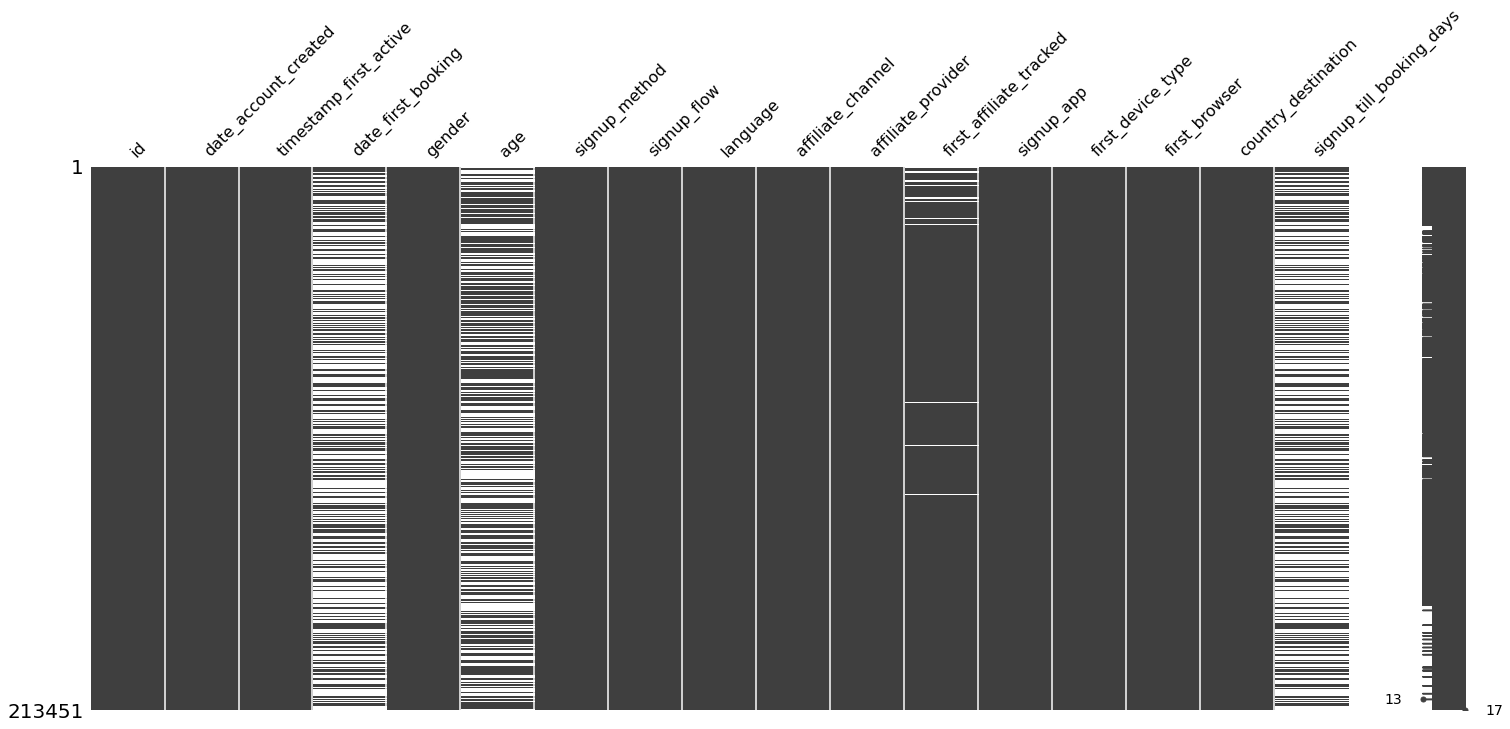

In [102]:
msno.matrix(df)

<AxesSubplot:>

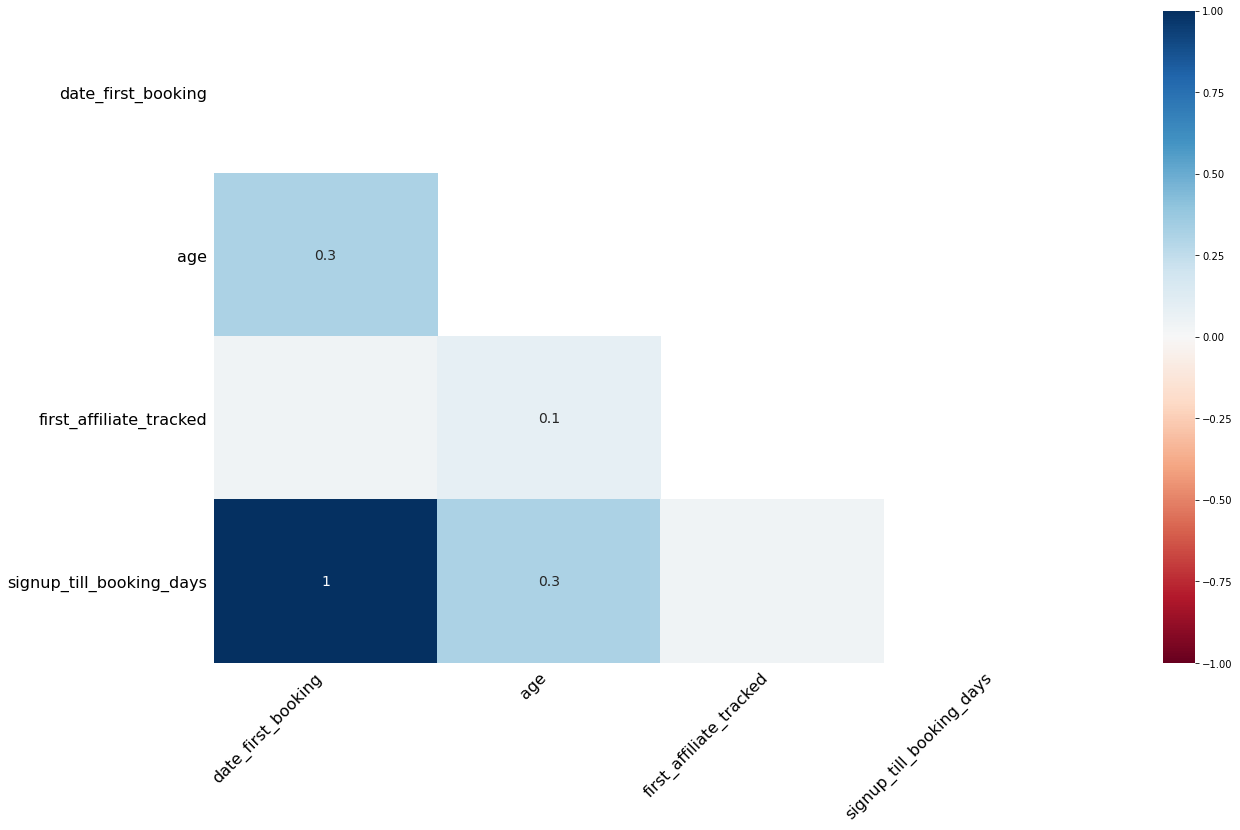

In [103]:
msno.heatmap(df)

<AxesSubplot:>

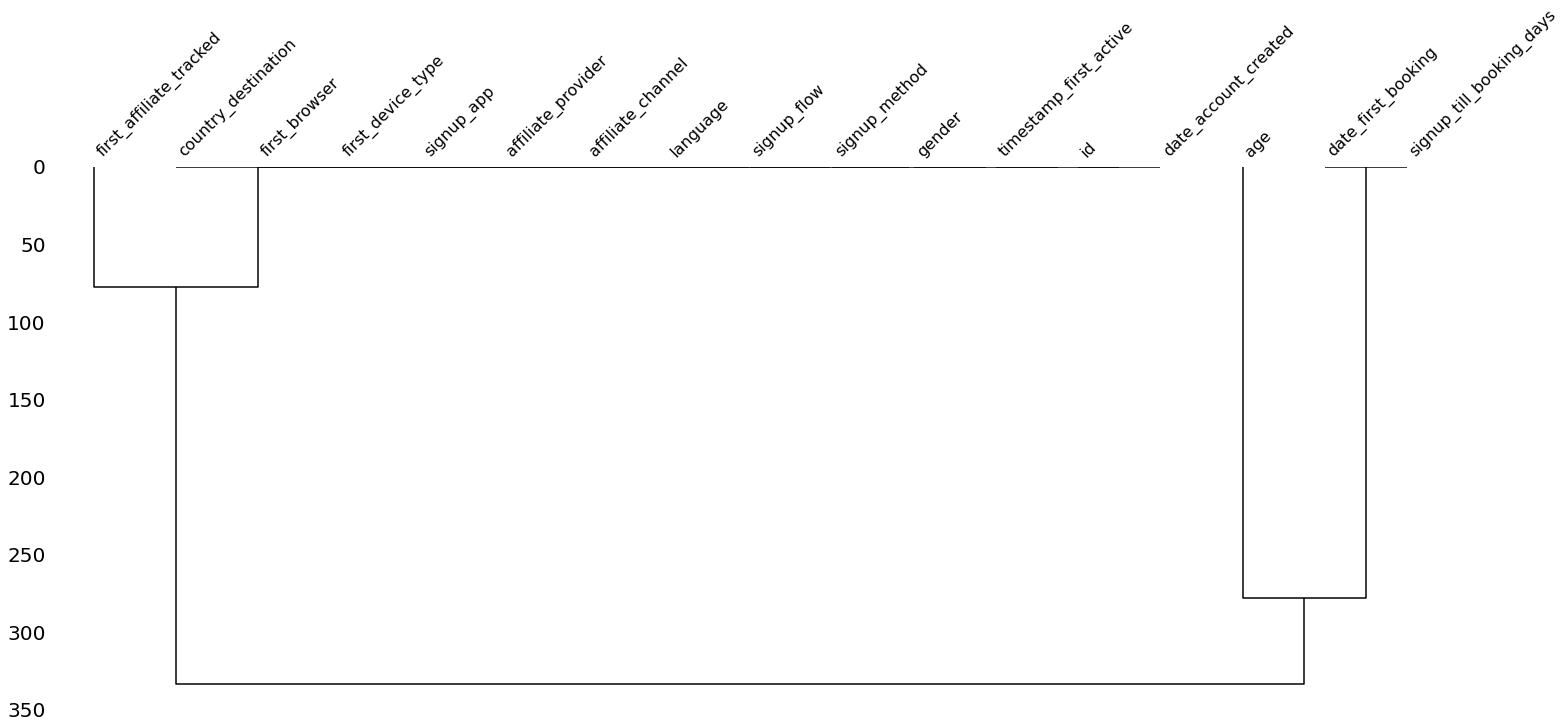

In [101]:
msno.dendrogram(df)

<AxesSubplot:>

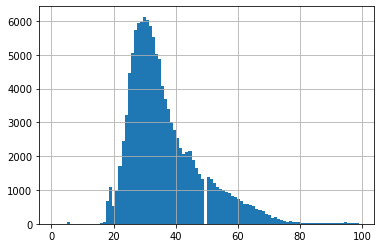

In [106]:
df[df.age<100].age.hist(bins=100)